In [6]:
import FdsPy.qe.myqengine as qe

univ = qe.IdUniverse(['DUMMY'])
ts = qe.TimeSeries(start_date = '20051230',end_date = '0',frequency='D',calendar = 'NAY')

data_dict = {"us_1y_yld":'SPEC_ID_DATA("TRYUS1Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_2y_yld":'SPEC_ID_DATA("TRYUS2Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_3y_yld":'SPEC_ID_DATA("TRYUS3Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_5y_yld":'SPEC_ID_DATA("TRYUS5Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_7y_yld":'SPEC_ID_DATA("TRYUS7Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_10y_yld":'SPEC_ID_DATA("TRYUS10Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_30y_yld":'SPEC_ID_DATA("TRYUS30Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_20y_yld":'SPEC_ID_DATA("TRYUS20Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_1M_yld":'SPEC_ID_DATA("TRYUS1M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_3M_yld":'SPEC_ID_DATA("TRYUS3M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_6M_yld":'SPEC_ID_DATA("TRYUS6M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',}

req = qe.Calculation(universe = univ,dates =ts,data_dict=data_dict,source = 'FqlExpression')

req.query()

req.data

,DATE,UNIVERSE,us_1y_yld,us_2y_yld,us_3y_yld,us_5y_yld,us_7y_yld,us_10y_yld,us_30y_yld,us_20y_yld,us_1M_yld,us_3M_yld,us_6M_yld
0,20051230,DUMMY,4.3800,4.4010,4.3700,4.3500,4.3600,4.3900,4.5100,NaN,3.9400,4.0800,4.2200
1,20060104,DUMMY,4.3500,4.3080,4.2800,4.2800,4.3100,4.3600,4.5500,NaN,3.9600,4.1900,4.2200
2,20060105,DUMMY,4.3600,4.3200,4.2900,4.2900,4.3100,4.3600,4.5100,NaN,3.9700,4.2000,4.2200
3,20060103,DUMMY,4.3800,4.3290,4.3000,4.3000,4.3200,4.3700,4.5200,NaN,3.9700,4.1600,4.2500
4,20060106,DUMMY,4.3800,4.3600,4.3200,4.3200,4.3300,4.3800,4.5300,NaN,3.9800,4.2200,4.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,20230913,DUMMY,5.4158,4.9904,4.6561,4.3941,4.3400,4.2564,4.3434,4.5291,5.3783,5.4772,5.5340
4455,20230915,DUMMY,5.4300,5.0325,4.7069,4.4598,4.4212,4.3344,4.4192,4.5994,5.3807,5.4687,5.5280
4456,20230914,DUMMY,5.4193,5.0114,4.6871,4.4207,4.3718,4.2873,4.3864,4.5669,5.3878,5.4685,5.5225
4457,20230918,DUMMY,5.4431,5.0410,4.7353,4.4651,4.4119,4.3185,4.3943,4.5761,5.3953,5.4679,5.5272


In [2]:
import pandas as pd
df = pd.read_pickle('../../data/misc/daily_yields_20230920.pkl')

In [3]:
#df = req.data
df = df.drop(columns = ['UNIVERSE'])
df=df.set_index('DATE')

<Axes: xlabel='DATE'>

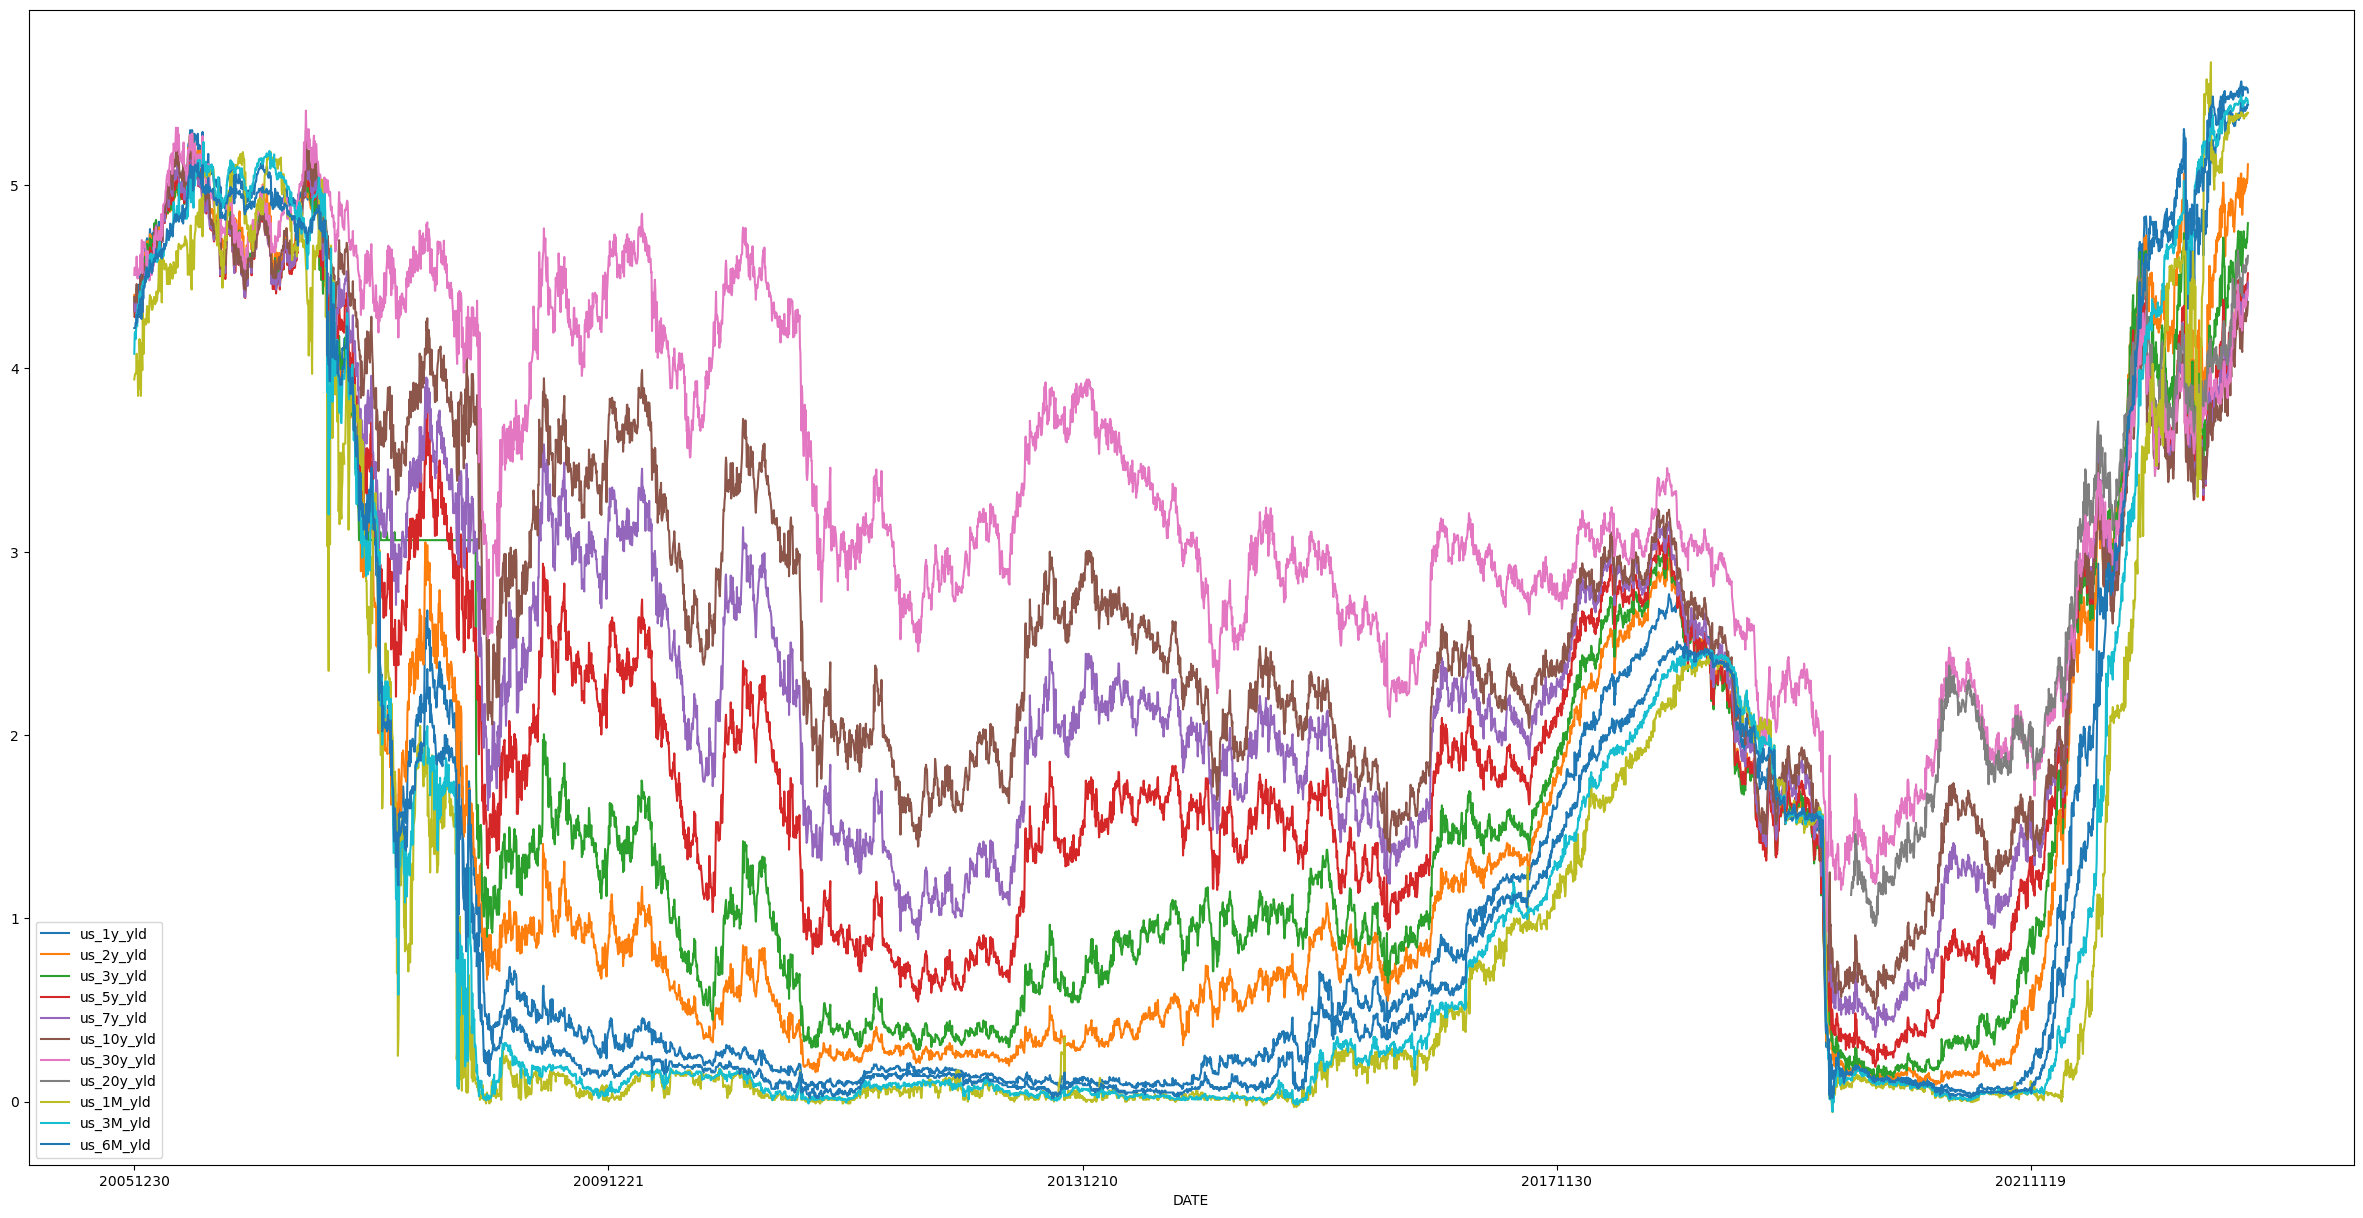

In [4]:
df.plot(figsize = (30,15))

In [5]:
df['Short Term (1m-6m)'] = df[['us_1M_yld','us_3M_yld','us_6M_yld']].mean(axis=1)
df['Short-Medium Term (1y-3y)'] = df[['us_1y_yld','us_2y_yld','us_3y_yld']].mean(axis=1)
df['Medium-Long Term (5y-10y)'] = df[['us_5y_yld','us_7y_yld','us_10y_yld']].mean(axis=1)
df['Long Term (10y-30y)'] = df[['us_10y_yld','us_20y_yld','us_30y_yld']].mean(axis=1)
df

,us_1y_yld,us_2y_yld,us_3y_yld,us_5y_yld,us_7y_yld,us_10y_yld,us_30y_yld,us_20y_yld,us_1M_yld,us_3M_yld,us_6M_yld,Short Term (1m-6m),Short-Medium Term (1y-3y),Medium-Long Term (5y-10y),Long Term (10y-30y)
DATE,,,,,,,,,,,,,,,
20051230,4.3800,4.4010,4.3700,4.3500,4.3600,4.3900,4.5100,NaN,3.9400,4.0800,4.2200,4.080000,4.383667,4.366667,4.450000
20060104,4.3500,4.3080,4.2800,4.2800,4.3100,4.3600,4.5500,NaN,3.9600,4.1900,4.2200,4.123333,4.312667,4.316667,4.455000
20060105,4.3600,4.3200,4.2900,4.2900,4.3100,4.3600,4.5100,NaN,3.9700,4.2000,4.2200,4.130000,4.323333,4.320000,4.435000
20060103,4.3800,4.3290,4.3000,4.3000,4.3200,4.3700,4.5200,NaN,3.9700,4.1600,4.2500,4.126667,4.336333,4.330000,4.445000
20060106,4.3800,4.3600,4.3200,4.3200,4.3300,4.3800,4.5300,NaN,3.9800,4.2200,4.2400,4.146667,4.353333,4.343333,4.455000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230913,5.4158,4.9904,4.6561,4.3941,4.3400,4.2564,4.3434,4.5291,5.3783,5.4772,5.5340,5.463167,5.020767,4.330167,4.376300
20230915,5.4300,5.0325,4.7069,4.4598,4.4212,4.3344,4.4192,4.5994,5.3807,5.4687,5.5280,5.459133,5.056467,4.405133,4.451000
20230914,5.4193,5.0114,4.6871,4.4207,4.3718,4.2873,4.3864,4.5669,5.3878,5.4685,5.5225,5.459600,5.039267,4.359933,4.413533


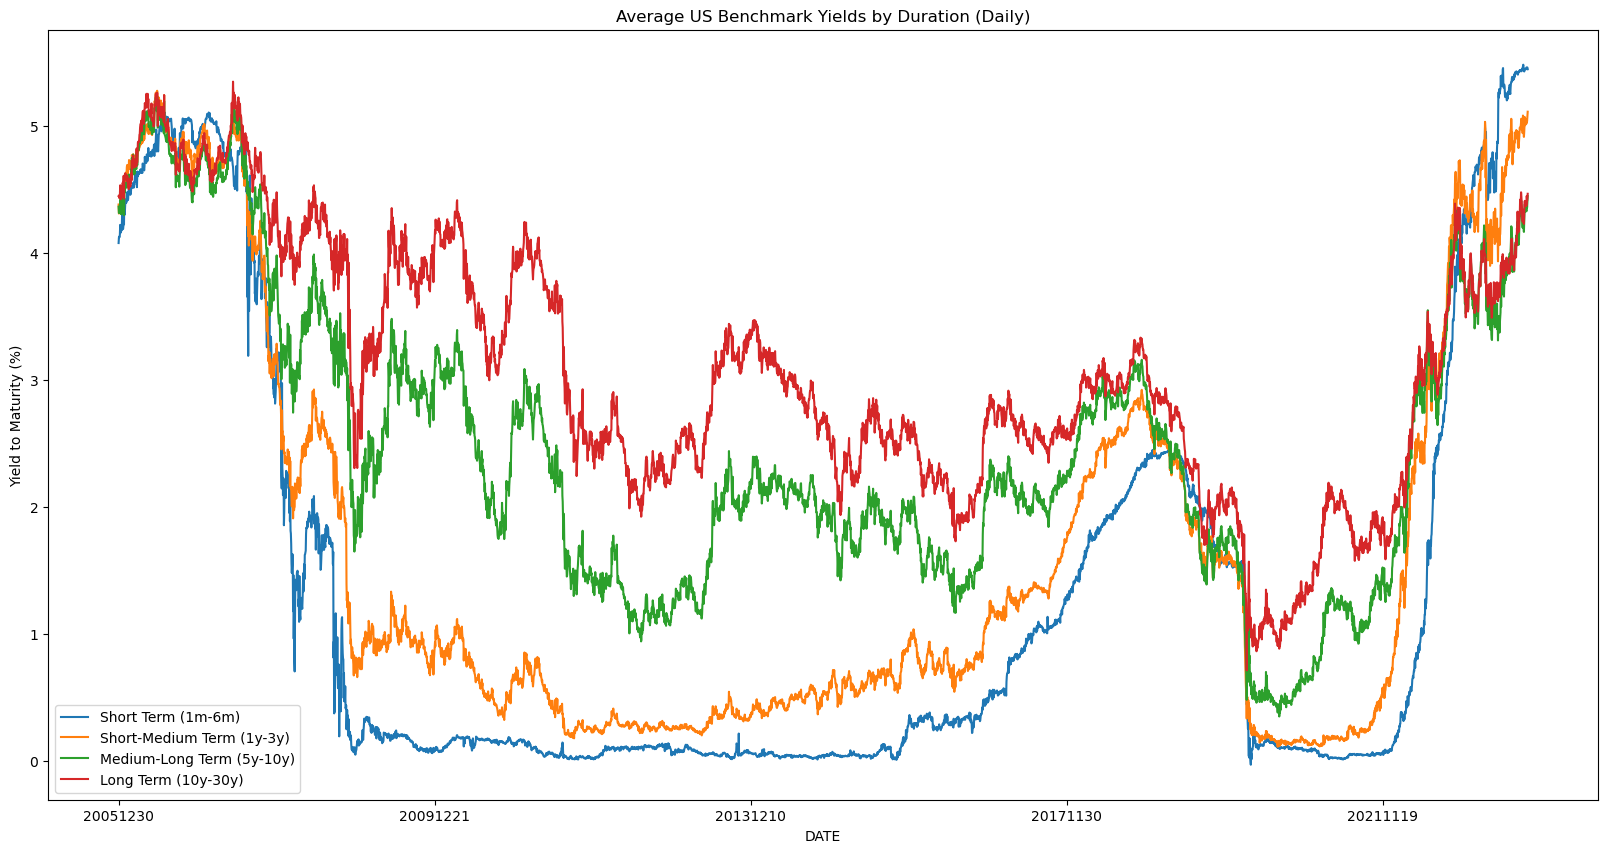

In [6]:
import matplotlib.pyplot as plt

df.iloc[:,-4:].plot(figsize = (20,10))
plt.title('Average US Benchmark Yields by Duration (Daily)')
plt.ylabel('Yield to Maturity (%)')
plt.savefig('us_benchmark_yields.png')
plt.show()